In [1]:
import numpy as np , matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import mnist

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18378743324381239506
xla_global_id: -1
]


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

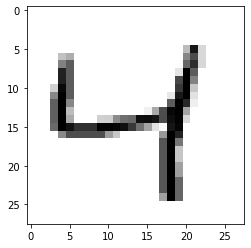

In [4]:
plt.imshow(x_train[2],'binary')

In [5]:
x_train[2].shape

(28, 28)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
#Normalized the images in [0,1]
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255
x_train.shape

(60000, 28, 28)

In [8]:
g=x_train
g=np.expand_dims(g,-1)
# g.shape
x_train=g
x_train.shape


(60000, 28, 28, 1)

In [9]:
h=x_test
h=np.expand_dims(h,-1)
# h.shape
x_test=h
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_train,y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [11]:
l=keras.utils.to_categorical(y_train)
l[0],l[2]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In the previous step , we converted the y_train to categorical divisions....mark the position of 1 
signifies that number

In [12]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [14]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
from keras .callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience =4,verbose=1, min_delta=.01)
mc=ModelCheckpoint("./rick.h5",monitor="val_acc",verbose=1,save_best_only=True)
cb=[es,mc]

In [31]:
model.fit(x_train,y_train,epochs=50,validation_split=.3)

Epoch 1/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0159 - accuracy: 0.9941 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 2/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.0475 - val_accuracy: 0.9882
Epoch 3/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 4/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0442 - val_accuracy: 0.9893
Epoch 5/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0437 - val_accuracy: 0.9902
Epoch 6/50
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0460 - val_accuracy: 0.9892
Epoch 7/50
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 0.0420 - val_ac

In [32]:
score=model.evaluate(x_test,y_test)
print(score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9915
0.9915000200271606


In [19]:
path="D:\\All-Projects\\eight.png"
test_img=plt.imread(path)

In [33]:
model.save('model_s.h5')

In [34]:
m_test=keras.models.load_model("D:\\All-Projects\\model_s.h5")


In [35]:
score=m_test.evaluate(x_test,y_test)
print(score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9915
0.9915000200271606
